# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.
> Оценка за домашку = min(ваш балл, 10)

Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.    
А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.    
Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#random.seed(42)
#np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

<font color='red'>**Комментарий:** Чтобы результаты были воспроизводимыми для сравнения результата, т.е. чтобы одни и те же были.</font>

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [38]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [39]:
display(df_train.sample(10))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [40]:
print('Первые 5 строк:')
display(df_train.head(5))
print('\n\nПоследние 5 строк:')
display(df_train.tail(5))

Первые 5 строк:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0




Последние 5 строк:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



<font color='red'>**Комментарий:** возможно это выглядит немного "коряво", зато все значения в одной таблице, надеюсь это не будет считаться ошибкой.</font>

In [41]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [42]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


<font color='red'>**Комментарий:** в **train** и **test** есть пропуски в одинаковых колонках mileage, engine, max_power, torque, seats</font>

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

<font color='red'>**Комментарий:** всего в train дублируется 1159 строк, если убрать дубликаты по этим строчкам, то это 640 объекта.</font>

In [45]:
new_df_train = df_train.loc[:, df_train.columns != 'selling_price']
new_df_train_duplicated = new_df_train[(new_df_train.duplicated())]


print(len(new_df_train_duplicated))
print(len(new_df_train_duplicated.drop_duplicates()))

1159
640


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [46]:
new_df_train_duplicated

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [47]:
columns_for_diplicate = ['name','year',
                         'km_driven','fuel',
                         'seller_type','transmission',
                         'owner','mileage','engine',
                         'max_power', 'torque', 'seats']

new_df_train = df_train.drop_duplicates(subset = columns_for_diplicate, keep='first')

new_df_train.shape

(5840, 13)

assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [48]:
new_df_train = new_df_train.reset_index(drop=True)
new_df_train.tail(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
5839,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

In [49]:
# извлекаем циферки
new_df_train['mileage'] = new_df_train['mileage'].str.extract(r'(\d+.\d+|\d+)').astype(float)
new_df_train['engine'] = new_df_train['engine'].str.extract(r'(\d+.\d+|\d+)').astype(float)
new_df_train['max_power'] = new_df_train['max_power'].str.extract(r'(\d+.\d+|\d+)').astype(float)

# удаляем столбец
new_df_train = new_df_train.drop('torque', axis=1)


df_test['mileage'] = df_test['mileage'].str.extract(r'(\d+.\d+|\d+)').astype(float)
df_test['engine'] = df_test['engine'].str.extract(r'(\d+.\d+|\d+)').astype(float)
df_test['max_power'] = df_test['max_power'].str.extract(r'(\d+.\d+|\d+)').astype(float)

new_df_test = df_test.drop('torque', axis=1)


display(new_df_train.head())
display(new_df_test.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,5.0


In [50]:
new_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5656 non-null   float64
 11  seats          5654 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [51]:
# your code here

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [52]:
mileage_median = round(new_df_train.mileage.median(),2)
engine_median = round(new_df_train.engine.median(),1)
max_power_median = round(new_df_train.max_power.median(),2)
seats_median = round(new_df_train.seats.median(),1)

# заполняем медианной с трейна
new_df_train['mileage'] = new_df_train['mileage'].fillna(mileage_median)
new_df_train['engine'] = new_df_train['engine'].fillna(engine_median)
new_df_train['max_power'] = new_df_train['max_power'].fillna(max_power_median)
new_df_train['seats'] = new_df_train['seats'].fillna(seats_median)

new_df_test['mileage'] = new_df_test['mileage'].fillna(mileage_median)
new_df_test['engine'] = new_df_test['engine'].fillna(engine_median)
new_df_test['max_power'] = new_df_test['max_power'].fillna(max_power_median)
new_df_test['seats'] = new_df_test['seats'].fillna(seats_median)

new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [53]:
new_df_train['engine'] = new_df_train['engine'].astype(int)
new_df_train['seats'] = new_df_train['seats'].astype(int)

new_df_test['engine'] = new_df_test['engine'].astype(int)
new_df_test['seats'] = new_df_test['seats'].astype(int)

new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int32  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 86.1+ KB


<font color='red'>**Комментарий**: seats, возможно, лучше сделать категориальной переменной, потому что признак имеет ограниченное количество значений.</font>

In [54]:
len_seats = new_df_train['seats'].unique()
print(len(len_seats), len_seats)

9 [ 5  4  7  8  6  9 10 14  2]


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

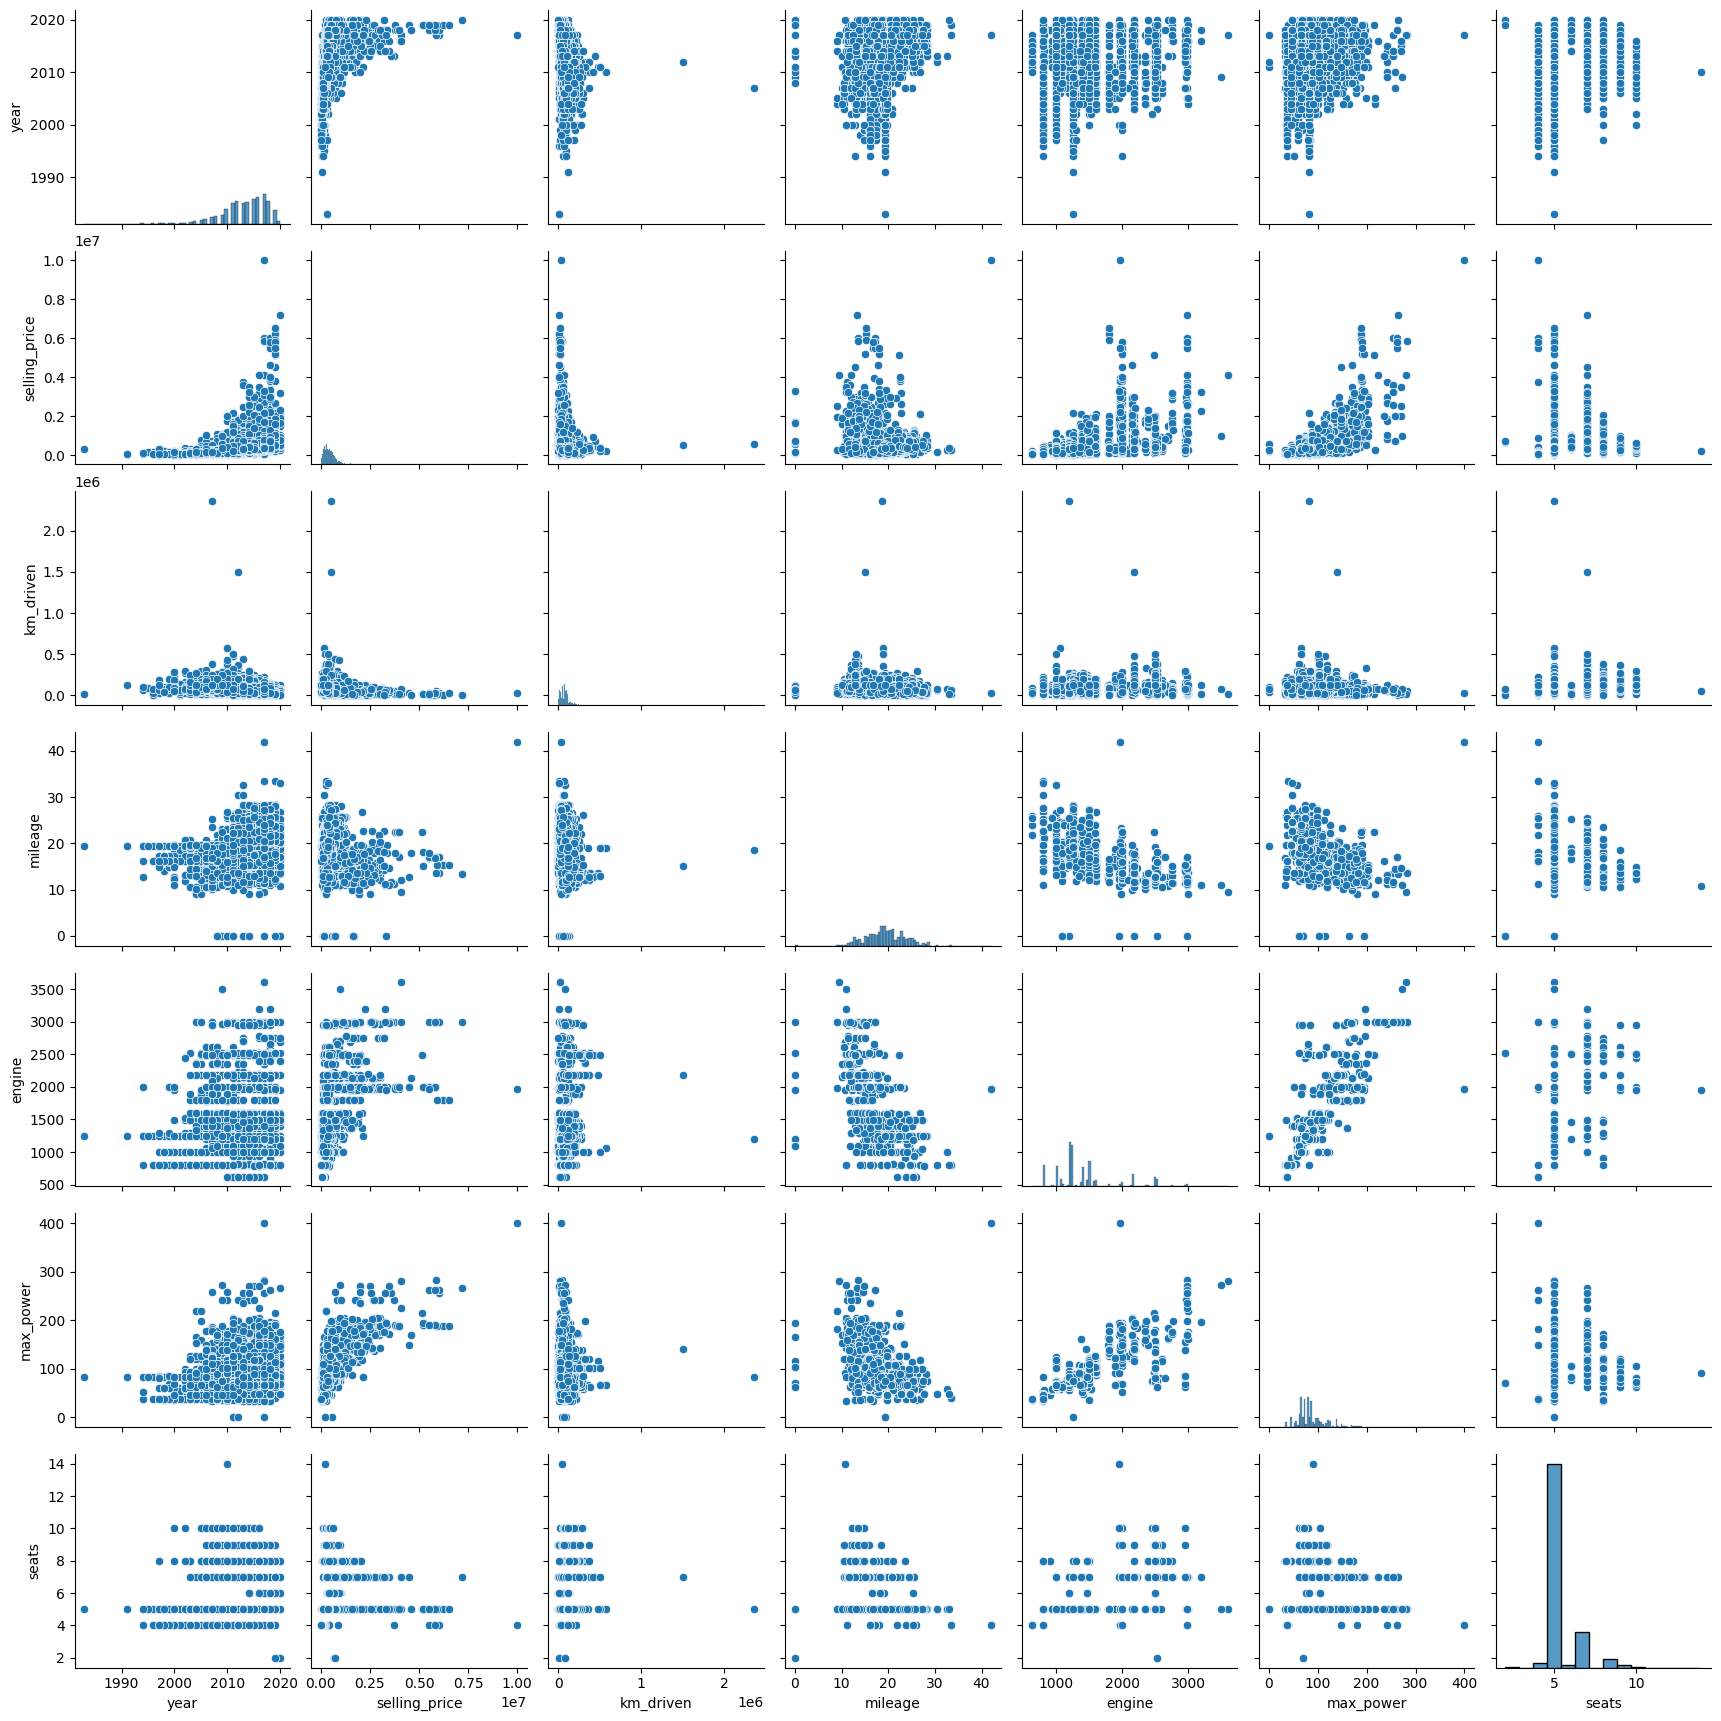

In [55]:
import seaborn as sns

sns.pairplot(new_df_train.select_dtypes(include='number'))

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

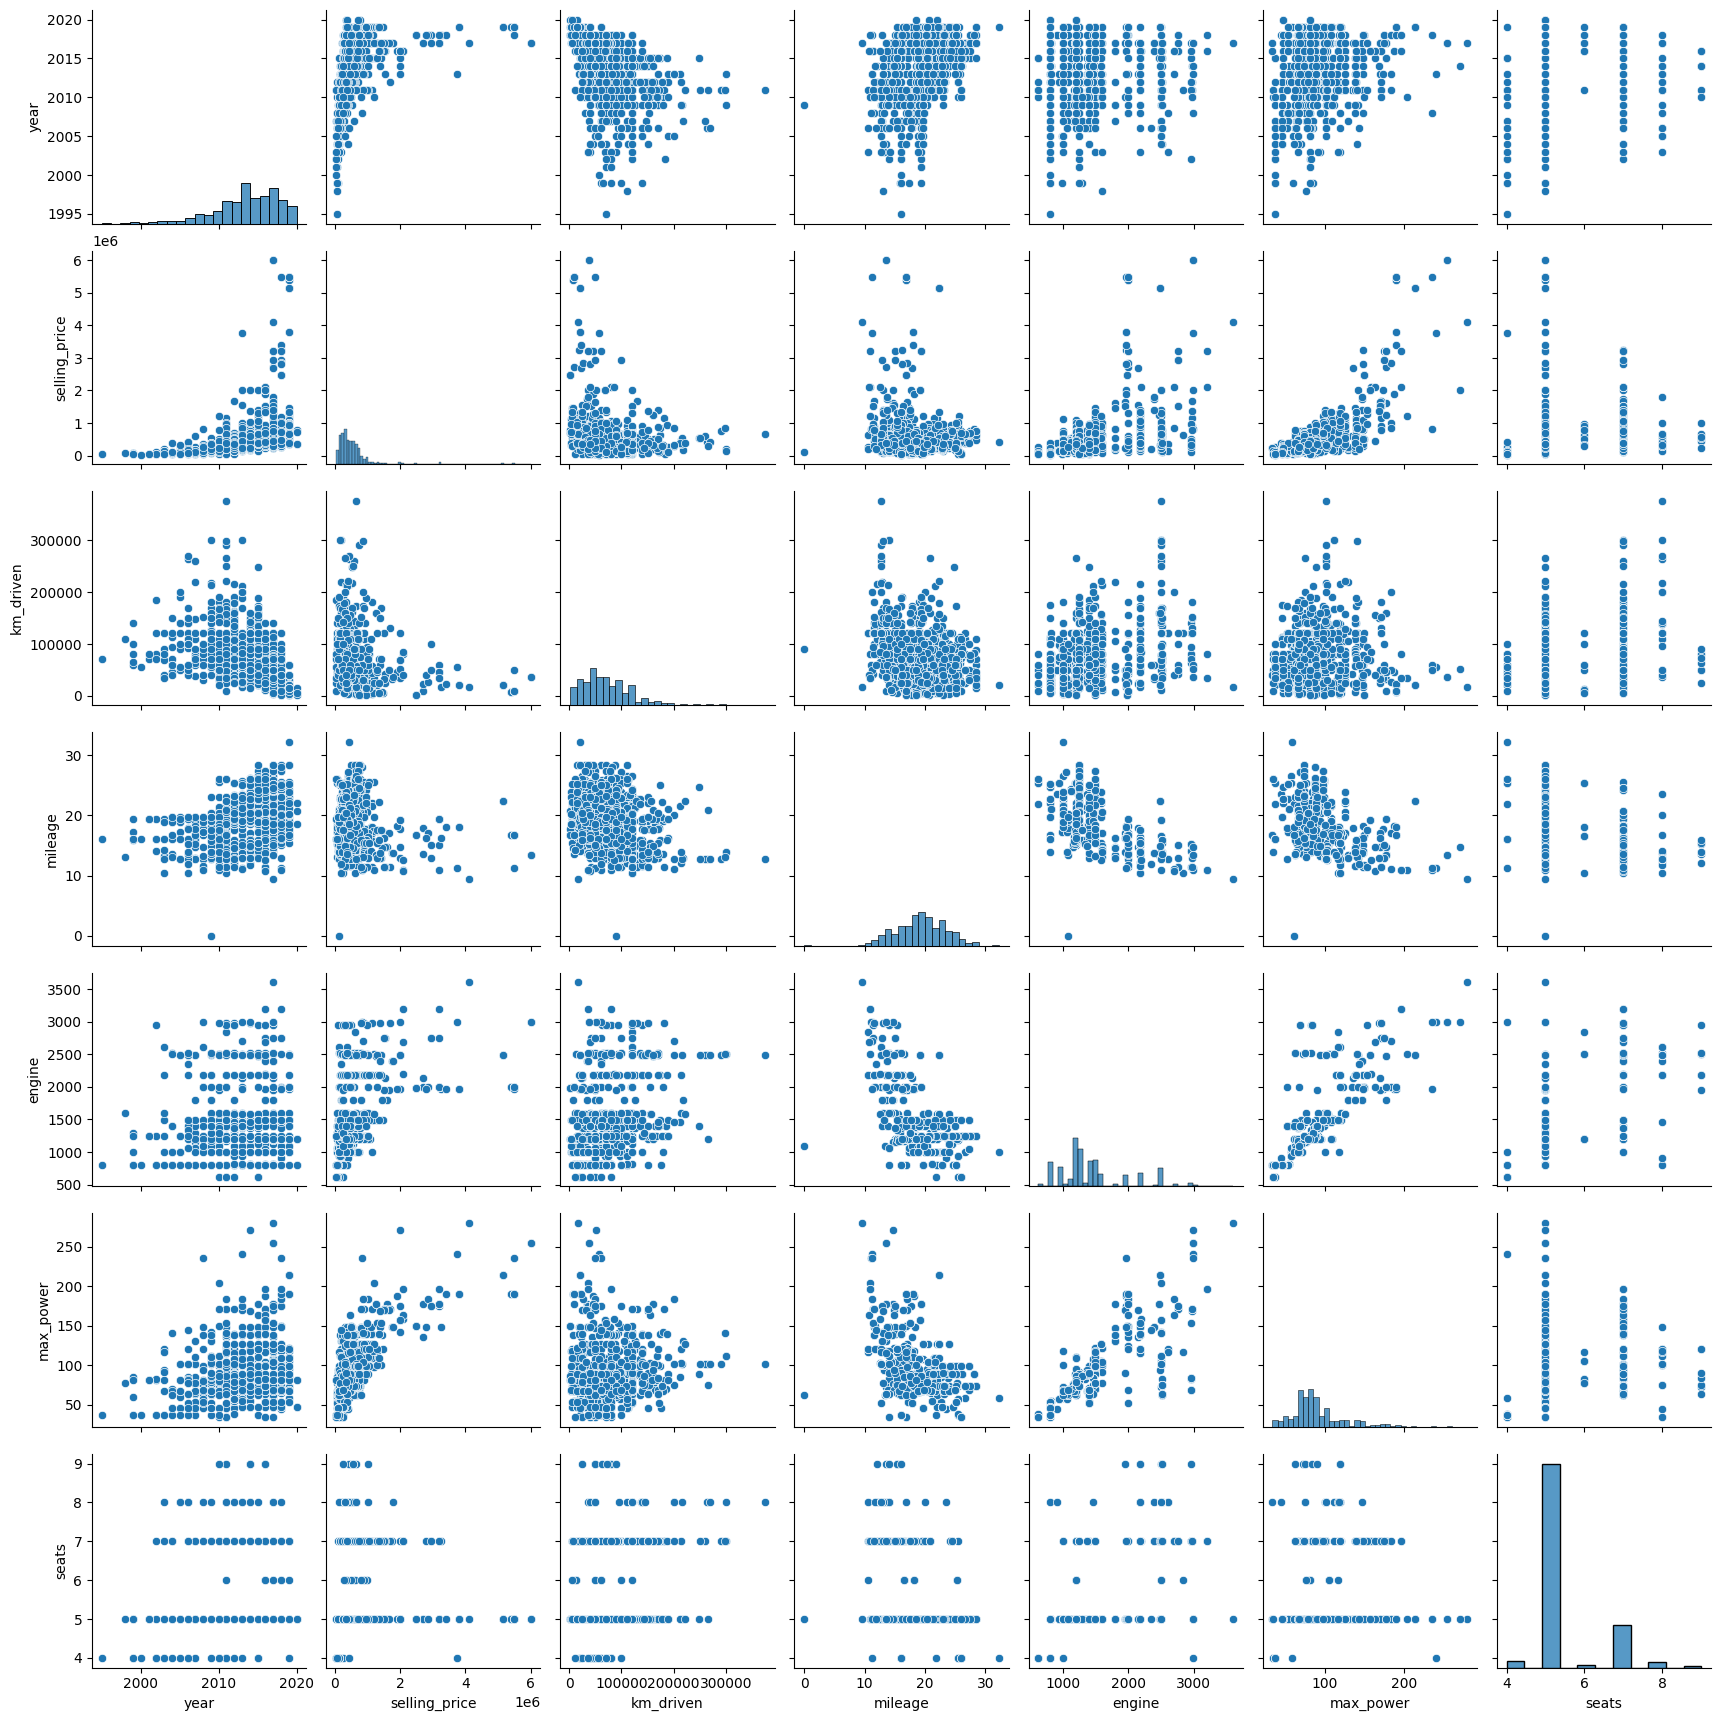

In [56]:
sns.pairplot(new_df_test.select_dtypes(include='number'))

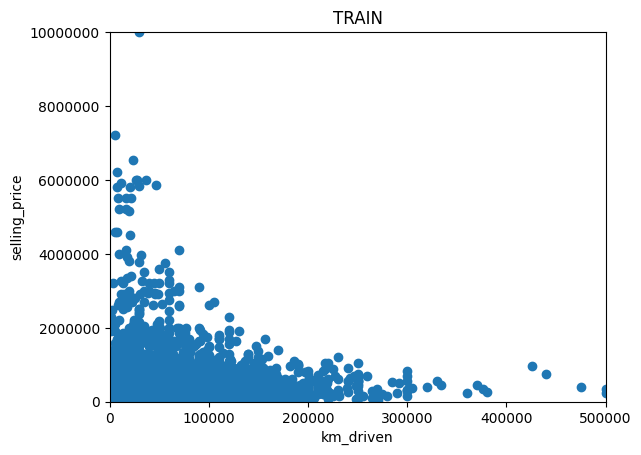

In [57]:
# график расссеяния km_driven и selling_price на ТРЕЙНЕ
plt.scatter(new_df_train['km_driven'], new_df_train['selling_price'])

# Установка форматирования осей
plt.ticklabel_format(style='plain')
plt.ylim(0, 10000000)
plt.xlim(0, 500000)

# Добавление подписей осей и заголовка
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('TRAIN')
plt.show()

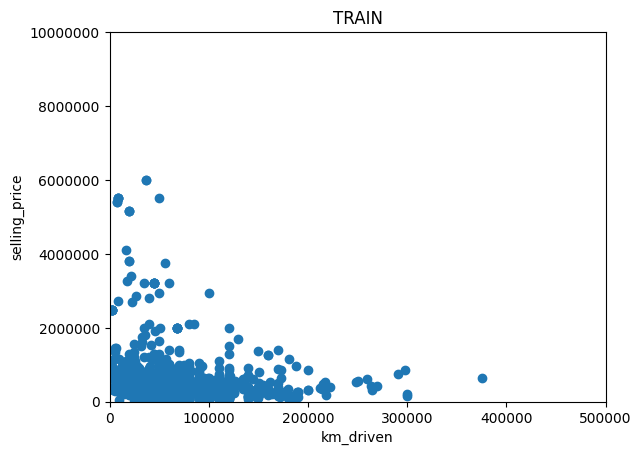

In [58]:
# график расссеяния km_driven и selling_price на ТЕСТЕ
plt.scatter(new_df_test['km_driven'], new_df_test['selling_price'])
plt.ticklabel_format(style='plain')
plt.ylim(0, 10000000)
plt.xlim(0, 500000)
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('TRAIN')
plt.show()

<font color='red'>**Комментарий**: Между train и test наибольшие различия заметны между признаком km_driven и целевой.    
Однако, в целом, данные мжду двумя датасетами схожи.</font>

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [59]:
new_df_train[['year','selling_price','km_driven','mileage','engine','max_power','seats']]

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248,74.00,5
1,2014,370000,120000,21.14,1498,103.52,5
2,2010,225000,127000,23.00,1396,90.00,5
3,2007,130000,120000,16.10,1298,88.20,5
4,2017,440000,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...,...
5835,2008,120000,191000,17.92,1086,62.10,5
5836,2013,260000,50000,18.90,998,67.10,5
5837,2013,320000,110000,18.50,1197,82.85,5
5838,2007,135000,119000,16.80,1493,110.00,5


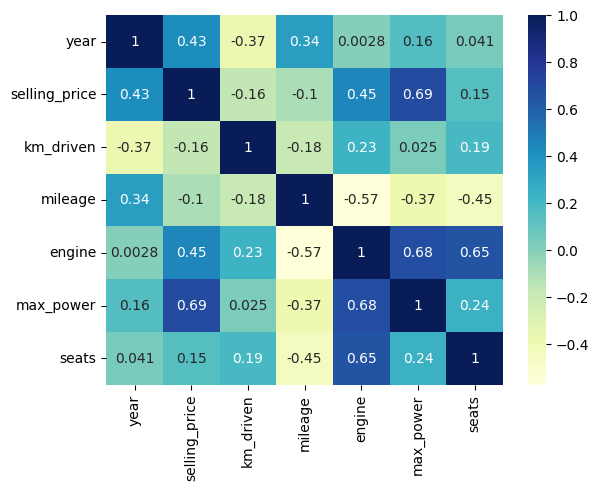

In [60]:
correlation_matrix = new_df_train[['year','selling_price','km_driven','mileage','engine','max_power','seats']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

<font color='red'>**Комментарий**:</font>     
<font color='red'>* year и engine - вообще не скоррелированы (corr = 0.0028)</font>     
<font color='red'>* selling_price и max_power - самая самая сильная положительная зависимость</font>     
<font color='red'>* в задании нет описания данных, поэтому предположим, что km_driven это пробег, тогда посмотрим на  значение корреляции между этими двумя признаками -0.37, что указывает на слабую отрицательную корреляцию. Т.е. она есть , но крайне слабая, поэтому нельзя достоверно утверждать, чем меньше год, тем больше километров проехала машина к дате продажи</font>

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<font color='red'>ТОП-3 группы наиболее скоррелированных признаков с целевой:</font>    
<font color='red'>1. selling_price и max_power</font>    
<font color='red'>2. selling_price и engine</font>    
<font color='red'>3. selling_price и year</font>    

<font color='red'>Наиболее скоррелированная пара - **selling_price** и **max_power**</font>

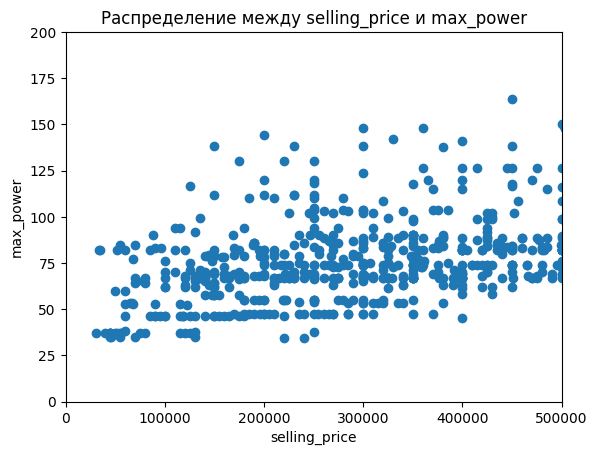

In [61]:
plt.scatter(new_df_test['selling_price'], new_df_test['max_power'])
plt.ticklabel_format(style='plain')
plt.ylim(0, 200)
plt.xlim(0, 500000)
plt.xlabel('selling_price')
plt.ylabel('max_power')
plt.title('Распределение между selling_price и max_power')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<font color='red'>**комментарий:** дополнительно посмтроим графики по оставшимся 2-ум группам</font>

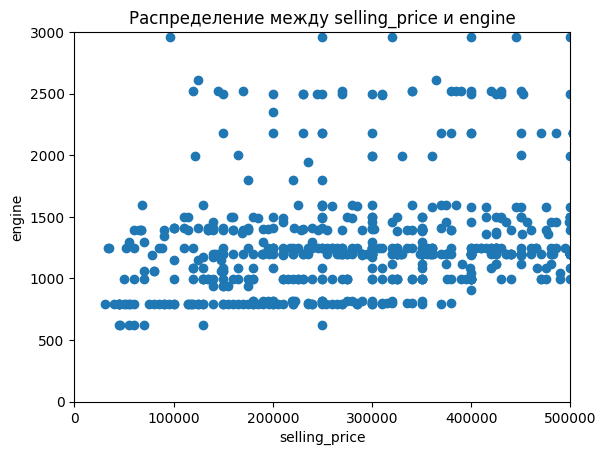

In [62]:
plt.scatter(new_df_test['selling_price'], new_df_test['engine'])
plt.ticklabel_format(style='plain')
plt.ylim(0, 3000)
plt.xlim(0, 500000)
plt.xlabel('selling_price')
plt.ylabel('engine')
plt.title('Распределение между selling_price и engine')
plt.show()

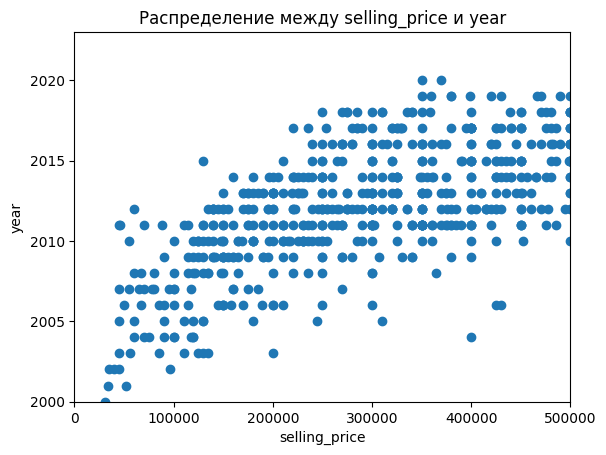

In [63]:
plt.scatter(new_df_test['selling_price'], new_df_test['year'])
plt.ticklabel_format(style='plain')
plt.ylim(2000, 2023)
plt.xlim(0, 500000)
plt.xlabel('selling_price')
plt.ylabel('year')
plt.title('Распределение между selling_price и year')
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [64]:
new_df_train[['year','selling_price','km_driven','mileage','engine','max_power','seats']]

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248,74.00,5
1,2014,370000,120000,21.14,1498,103.52,5
2,2010,225000,127000,23.00,1396,90.00,5
3,2007,130000,120000,16.10,1298,88.20,5
4,2017,440000,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...,...
5835,2008,120000,191000,17.92,1086,62.10,5
5836,2013,260000,50000,18.90,998,67.10,5
5837,2013,320000,110000,18.50,1197,82.85,5
5838,2007,135000,119000,16.80,1493,110.00,5


In [65]:
y_train = new_df_train[['selling_price']]
X_train = new_df_train[['year','km_driven','mileage','engine','max_power','seats']]

print(y_train.shape)
print(X_train.shape)

(5840, 1)
(5840, 6)


In [66]:
assert X_train.shape == (5840, 6)

In [67]:
y_test = new_df_test[['selling_price']]
X_test = new_df_test[['year','km_driven','mileage','engine','max_power','seats']]

print(y_test.shape)
print(X_test.shape)

(1000, 1)
(1000, 6)


In [68]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# строим модель
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# предсказываем
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

# считаем метрики
r2_train = round(r2_score(y_train, y_train_pred),4)
mse_train = round(MSE(y_train, y_train_pred))
r2_test = round(r2_score(y_test, y_test_pred),4)
mse_test = round(MSE(y_test, y_test_pred))

print(f'''для TRAIN: R^2: {r2_train}, MSE: {mse_train}
для TEST: R^2: {r2_test}, MSE: {mse_test}''')

для TRAIN: R^2: 0.5923, MSE: 116874153930
для TEST: R^2: 0.5941, MSE: 233298779730


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head(3)

,year,km_driven,mileage,engine,max_power,seats
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,-0.434419
1,0.139570,0.766619,0.428830,0.141162,0.493513,-0.434419
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,-0.434419


In [71]:
X_train_scaled.mean()

year         2.328122e-14
km_driven   -6.205082e-17
mileage     -9.027786e-16
engine      -1.301851e-16
max_power    3.485796e-16
seats        2.640202e-16
dtype: float64

In [72]:
X_train_scaled.median()

year         0.139570
km_driven   -0.065798
mileage     -0.015265
engine      -0.373643
max_power   -0.191113
seats       -0.434419
dtype: float64

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

<font color='red'>**Комментарий:** по среднему наибольшее влияние оказывает признак mileage, однако по медиане это признак seats. Т.к. среднее является более стабильной мерой центральной тенденции и обычно дает более точную оценку среднего значения признака в выборке, то выберем среднее. По итогу наиболее влияющим признаком будет **mileage**.</font>

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [73]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=8150)
lasso_model.fit(X_train_scaled, y_train)


y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)


r2_train_lasso = round(r2_score(y_train, y_train_pred_lasso),4)
mse_train_lasso = round(MSE(y_train, y_train_pred_lasso))

r2_test_lasso = round(r2_score(y_test, y_test_pred_lasso),4)
mse_test_lasso = round(MSE(y_test, y_test_pred_lasso))


print(f'''для TRAIN: R^2: {r2_train_lasso}, MSE: {mse_train_lasso}
для TEST: R^2: {r2_test_lasso}, MSE: {mse_test_lasso}\n''')

print(X_train_scaled.columns,f'\n')
print(lasso_model.coef_)

для TRAIN: R^2: 0.59, MSE: 117531056309
для TEST: R^2: 0.5835, MSE: 239413651671

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object') 

[151157.3178051  -35077.35328495  13776.86214445  22424.11980873
 329795.89981183     -0.        ]


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

<font color='red'>**Комментарий**: пробовал подбирать разные коэффициенты, примерно от 8150 L1 начала занулять коэффициенты. Это происходит потому что L1-регуляризация ввдоит штраф на абсолютные значение весов признаков, необходимое для отбора наиболее значимых. В данном случае при коэффициенте 8150 "отвалился" признак seats.</font>

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [74]:
from sklearn.model_selection import GridSearchCV


lasso_model_ten_fold = Lasso()

# Задаем список параметров
param_grid = {'alpha': [i for i in range(50000) if i%100 == 0]}

# Передаем модель регрессии, сетку параметров и количество фолдов
grid_search = GridSearchCV(lasso_model_ten_fold, param_grid, cv=10)

# Обучаем
grid_search.fit(X_train_scaled, y_train)

# Выводим лучшие параметры и значение метрики для лучшей модели
print("Лучший параметр:", grid_search.best_params_)
print("Лучшее значение метрики:", grid_search.best_score_)

Лучший параметр: {'alpha': 26600}
Лучшее значение метрики: 0.5750274755495216


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='red'>**Комментарий**: если я правильно понял вопрос, то время обучения можно вытянуть из параметра mean_fit_time</font>

In [75]:
# Получение информации о времени выполнения
fit_time = grid_search.cv_results_['mean_fit_time']
print("Время выполнения обучения:", sum(fit_time), 'сек.')

Время выполнения обучения: 1.1237578392028806 сек.


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

<font color='red'>**Комментарий + график**: после значения 26600 коэффециента регуляризации, значение метрики начинает падать. Значит 26600 - это наше искомое. </font>

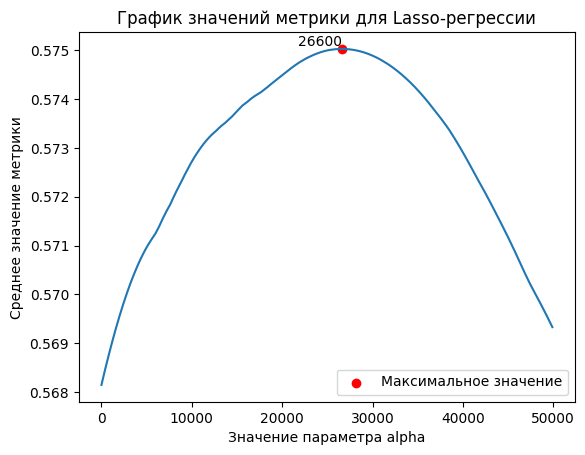

In [76]:
# Получаем значения параметров, которые были перебраны
param_values = grid_search.cv_results_['param_alpha'].data

# Получаем значения метрик для каждой комбинации параметров
mean_scores = grid_search.cv_results_['mean_test_score']

# Точка с макс.знач.
max_index = np.argmax(mean_scores)

plt.plot(param_values, mean_scores)
plt.xlabel('Значение параметра alpha')
plt.ylabel('Среднее значение метрики')
plt.title('График значений метрики для Lasso-регрессии')

# Отмечаем макс.знач. на графике
plt.scatter(param_values[max_index], mean_scores[max_index], color='r', label='Максимальное значение')
plt.text(param_values[max_index], mean_scores[max_index], param_values[max_index], ha='right', va='bottom')

plt.legend()
plt.show()

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [77]:
from sklearn.linear_model import ElasticNet

# Список параметров
param_grid = {
    'alpha': [0.1, 0.9, 1.0, 10.0, 1000],
    'l1_ratio': [0.1, 0.5, 0.9, 1, 10, 50, 100, 1000]
}

# Модель
elastic_model_ten_fold = ElasticNet()

# Модель, параметры, фолды
grid_search = GridSearchCV(estimator = elastic_model_ten_fold,
                           param_grid = param_grid,
                           cv = 10)

# Обучаем
grid_search.fit(X_train_scaled, y_train)

# Выводим наилучшие параметры и оценку качества модели
print("Наилучшие параметры:", grid_search.best_params_)
print("Оценка модели:", grid_search.best_score_)

Наилучшие параметры: {'alpha': 1.0, 'l1_ratio': 0.9}
Оценка модели: 0.5761314666976897


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

<font color='red'>**Комментарий**:</font>    
<font color='red'>* alpha: 1.0</font>    
<font color='red'>* l1_ratio: 0.9</font>    

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [78]:
X_train_cat = new_df_train[['year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats']]
X_train_cat.shape

(5840, 10)

In [79]:
assert X_train_cat.shape == (5840, 10)

In [80]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [81]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# Применяем One-Hot кодирование с помощью функции get_dummies()
X_train_cat_ohe = pd.get_dummies(X_train_cat,prefix =['fuel','seller_type','transmission','owner'],drop_first = True)

X_train_cat_ohe.head()

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,5,True,False,False,True,False,True,False,False,False,False
1,2014,120000,21.14,1498,103.52,5,True,False,False,True,False,True,False,True,False,False
2,2010,127000,23.00,1396,90.00,5,True,False,False,True,False,True,False,False,False,False
3,2007,120000,16.10,1298,88.20,5,False,False,True,True,False,True,False,False,False,False
4,2017,45000,20.14,1197,81.86,5,False,False,True,True,False,True,False,False,False,False


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_cat_ohe)
X_train_cat_ohe_scaled = scaler.transform(X_train_cat_ohe)
X_train_cat_ohe_scaled = pd.DataFrame(X_train_cat_ohe_scaled,
                              columns = X_train_cat_ohe.columns)

X_train_cat_ohe_scaled.head(3)

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,-0.434419,0.915539,-0.076525,-0.889304,0.343702,-0.065568,0.307332,-0.156721,-0.624616,-0.02618,-0.290332
1,0.139570,0.766619,0.428830,0.141162,0.493513,-0.434419,0.915539,-0.076525,-0.889304,0.343702,-0.065568,0.307332,-0.156721,1.600984,-0.02618,-0.290332
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,-0.434419,0.915539,-0.076525,-0.889304,0.343702,-0.065568,0.307332,-0.156721,-0.624616,-0.02618,-0.290332


In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Задаем набор значений параметра alpha для перебора
param_grid = {
    'alpha': [i for i in range(900,910)]
}

# Создаем экземпляр модели Ridge
model = Ridge()

# Создаем экземпляр GridSearchCV с указанными параметрами
grid_search = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           cv = 10,
                           scoring = 'r2')

# Обучаем модель с использованием GridSearchCV
grid_search.fit(X_train_cat_ohe_scaled, y_train)

# Выводим наилучший параметр alpha и оценку качества модели
print("Наилучший параметр alpha:", grid_search.best_params_['alpha'])
print("Оценка качества модели (R^2):", grid_search.best_score_)

Наилучший параметр alpha: 900
Оценка качества модели (R^2): 0.6048181061179883


<font color='red'>**Комментарий**: 900 это лучший результат.</font>    

<font color='red'>**До списка 900-910, пробовал**:</font>      
<font color='red'>[i for i in range(1,50000) if i%100 == 0] - выдало 900</font>    
<font color='red'>потом сузил - [i for i in range(900,1000) if i%10 == 0] - выдало 900</font>        
<font color='red'>В итоге остановился на [i for i in range(900,910)] - тоже выдало 900</font>    

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

<font color='red'>**Комментарий**: Сначала необходимо собрать предыдущие наработки и объеденить воедино - возьмем наш лучший датасет и лучшую модель, будем отталкиваться от них.</font>

<font color='red'>**Комментарий 2**: Мною были протестированы несколько способов обогащения данных:</font>    
<font color='red'>* добавление к каждому числовому параметру его квадрата - помогло, ниже результаты R^2</font>    
<font color='red'>* логарифмирование целевого признака - помогло, ниже результаты R^2</font>    
<font color='red'>* выделение названия машины - был тест не принесло особых успехов</font>    
<font color='red'>* оценка выбросов для целевого - тут все очень интересно, если убрать выбросы, то из трейна пропадает категория 'Test Drive Car' из признака owner, что сказывается на последующей эффективности модели. </font>    

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from joblib import dump, load

from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

random.seed(42)
np.random.seed(42)


# ==============================  0. Загрузка данных  ==============================
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')



def delete_outliers(data):
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    lower_bound = np.percentile(data, 25) - 1.5 * IQR
    upper_bound = np.percentile(data, 75) + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers


def preprocessing_f(start_df, type_df = 'new'):
    columns_for_diplicate = ['name','year',
                         'km_driven','fuel',
                         'seller_type','transmission',
                         'owner','mileage','engine',
                         'max_power', 'torque', 'seats']

    # ==============================  1. Препроцессинг данных - чистка ==============================
    # 1.1 - Удаление дубликатов
    new_df_train = start_df.drop_duplicates(subset = columns_for_diplicate, keep='first')
    new_df_train = new_df_train.reset_index(drop=True)


    # 1.2 - Обработка признаков
    # трейн
    new_df_train['mileage'] = new_df_train['mileage'].str.extract(r'(\d+.\d+|\d+)').astype(float)
    new_df_train['engine'] = new_df_train['engine'].str.extract(r'(\d+.\d+|\d+)').astype(float)
    new_df_train['max_power'] = new_df_train['max_power'].str.extract(r'(\d+.\d+|\d+)').astype(float)

    # 1.3 - Удаление "лишних" столбцов
    new_df_train = new_df_train.drop('torque', axis=1)
    new_df_test = df_test.drop('torque', axis=1)

    # 1.4 - заполнение пустых значений
    mileage_median = round(new_df_train.mileage.median(),2)
    engine_median = round(new_df_train.engine.median(),1)
    max_power_median = round(new_df_train.max_power.median(),2)
    seats_median = round(new_df_train.seats.median(),1)

    # трейн
    new_df_train['mileage'] = new_df_train['mileage'].fillna(mileage_median)
    new_df_train['engine'] = new_df_train['engine'].fillna(engine_median)
    new_df_train['max_power'] = new_df_train['max_power'].fillna(max_power_median)
    new_df_train['seats'] = new_df_train['seats'].fillna(seats_median)

    # 1.5 - форматы
    # трейн
    new_df_train['engine'] = new_df_train['engine'].astype(int)
    new_df_train['seats'] = new_df_train['seats'].astype(int)

    # ==============================  2. Препроцессинг данных - добавление фичей  ==============================
    # 2.1 - квадраты числовых параметров
    new_df_train['year_2'] = new_df_train['year']**2
    new_df_train['km_driven_2'] = new_df_train['km_driven']**2
    new_df_train['mileage_2'] = new_df_train['mileage']**2
    new_df_train['engine_2'] = new_df_train['engine']**2
    new_df_train['max_power_2'] = new_df_train['max_power']**2
    
    # 2.2 - Выделяем X,Y
    if type_df == 'pred':
        y_train = new_df_train[['selling_price']]
    elif type_df == 'test':
        y_train = new_df_train[['selling_price']]
    else:
        y_train = None
        
    X_train_fin = new_df_train[['year','km_driven','fuel','seller_type',
                                'transmission','mileage','engine','max_power','seats',#'mark_name',
                                'year_2', 'km_driven_2', 'mileage_2','engine_2',
                                'max_power_2']]
    return X_train_fin, y_train


X_train, Y_train = preprocessing_f(df_train,type_df = 'pred')
print(X_train.shape, Y_train.shape)

(5840, 14) (5840, 1)


In [97]:
# ==============================  2.1 Логарифмирование целевой  ==============================
Y_train['selling_price'] = np.log(Y_train.selling_price)

In [102]:
# ==============================  3. Кодировка  ==============================
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train[['fuel','seller_type','transmission']])
dump(encoder, 'encoder.pkl')

def encoder_f(X_start):
    X_cat = X_start[['fuel','seller_type','transmission']]
    encoder_loaded = load('encoder.pkl')
    encoded_data_array = encoder_loaded.transform(X_cat).toarray()
    encoded_df = pd.DataFrame(encoded_data_array,
                              columns = encoder_loaded.get_feature_names_out(list(X_cat.columns))).reset_index(drop=True)

    X_fin = X_start.drop(X_cat, axis=1).reset_index(drop=True)
    X_encoded = pd.concat([X_fin, encoded_df], axis=1)
    return X_encoded

X_encoded = encoder_f(X_train)

print(X_encoded.columns)
print(X_encoded.shape)

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'year_2', 'km_driven_2', 'mileage_2', 'engine_2', 'max_power_2',
       'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual'],
      dtype='object')
(5840, 20)


In [103]:
# ==============================  4. Стандартизация  ==============================
scaler = StandardScaler()
scaler.fit_transform(X_encoded)
dump(scaler, 'scaler.pkl')

def scaler_f(X):
    scaler_loaded = load('scaler.pkl') 
    X_encoded_scaled = scaler_loaded.transform(X)
    X_encoded_scaled = pd.DataFrame(X_encoded_scaled,columns = X.columns)
    return X_encoded_scaled

X_encoded_scaled = scaler_f(X_encoded)
print(X_encoded_scaled.shape)

(5840, 20)


In [104]:
# ==============================  5. Модель  ==============================
param_grid = {'alpha': [0.0003]}
model = Ridge()
grid_search = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           cv = 10,
                           scoring = 'r2')
grid_search.fit(X_encoded_scaled, Y_train)

# сохраняем модельку
dump(grid_search, 'grid_search_model.pkl')


# ==============================  6. Оценка результатов  ==============================
# Выводим наилучший параметр alpha и оценку качества модели
print("Наилучший параметр alpha:", grid_search.best_params_['alpha'])
print("Оценка качества модели (R^2):", grid_search.best_score_)

Наилучший параметр alpha: 0.0003
Оценка качества модели (R^2): 0.8380455608432762


<font color='red'>**Комментарий**: ниже итоги предсказания предсказание.</font>

In [105]:
X_new,Y_new = preprocessing_f(df_test, type_df = 'pred')
X_new_encoded = encoder_f(X_new)
X_new_encoded_scaled = scaler_f(X_new_encoded)


model_loaded = load('grid_search_model.pkl')

Y_new_pred = model_loaded.predict(X_new_encoded_scaled)
Y_new_pred = np.exp(Y_new_pred)

print('R^2: ',r2_score(Y_new, Y_new_pred))
print('MSE: ',MSE(Y_new, Y_new_pred))

R^2:  0.8409187288752795
MSE:  56963088904.68703


<font color='red'>**Комментарий**: на трейне R^2 показал ~0.84, а на тесте 0.84, что является неплохим результатом. Ниже дополнительные визуализации и аналитика.</font>

In [106]:
y_pred = pd.DataFrame(Y_new_pred, columns = ['pred'])
merged_df = pd.concat([Y_new, y_pred], axis = 1)
merged_df['pred_min_fact'] = merged_df['pred'] - merged_df['selling_price']
merged_df['pred_proc_fact'] = abs((merged_df['pred'] / merged_df['selling_price'])-1)

def f(row):
    if abs(row['pred_proc_fact']) <= 0.1:
        val = '<= 10'
    elif abs(row['pred_proc_fact']) <= 0.2:
        val = '10-20'
    elif abs(row['pred_proc_fact']) <= 0.3:
        val = '<= 30'
    elif abs(row['pred_proc_fact']) <= 0.4:
        val = '<= 40'
    elif abs(row['pred_proc_fact']) <= 0.5:
        val = '<= 50'
    elif abs(row['pred_proc_fact']) <= 0.6:
        val = '<= 60'
    elif abs(row['pred_proc_fact']) <= 0.7:
        val = '<= 70'
    else :
        val = '>70'
    return val


merged_df['grp_pred_proc_fact'] = merged_df.apply (f, axis=1)
merged_df.head(3)

,selling_price,pred,pred_min_fact,pred_proc_fact,grp_pred_proc_fact
0,229999,419149.784487,189150.784487,0.822398,>70
1,665000,807400.325389,142400.325389,0.214136,<= 30
2,175000,279339.592516,104339.592516,0.596226,<= 60


<font color='red'>**Комментарий**: Ниже представлен график на сколько % по медиане предсказание ошибается от факта - около 18%.</font>

In [107]:
merged_df.pred_proc_fact.median()

0.18325787939220617

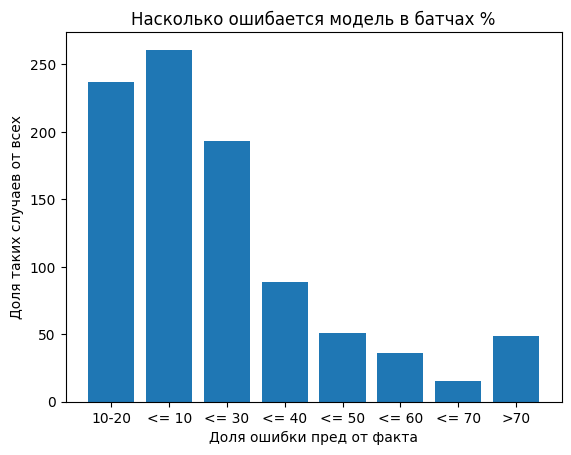

In [108]:
import matplotlib.pyplot as plt


data_fin = merged_df[['grp_pred_proc_fact','selling_price']].groupby(['grp_pred_proc_fact']).agg('count').reset_index()
data_fin = merged_df[['grp_pred_proc_fact','selling_price']].groupby(['grp_pred_proc_fact']).agg('count').reset_index()

plt.bar(data_fin.grp_pred_proc_fact, data_fin.selling_price)

# Задание названия графика и осей
plt.title("Насколько ошибается модель в батчах %")
plt.xlabel("Доля ошибки пред от факта")
plt.ylabel("Доля таких случаев от всех")


# Отображение гистограммы
plt.show()


#Сохранение датафрейма в файл CSV
df_test[['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']].to_csv('test_data1.csv', index=False)

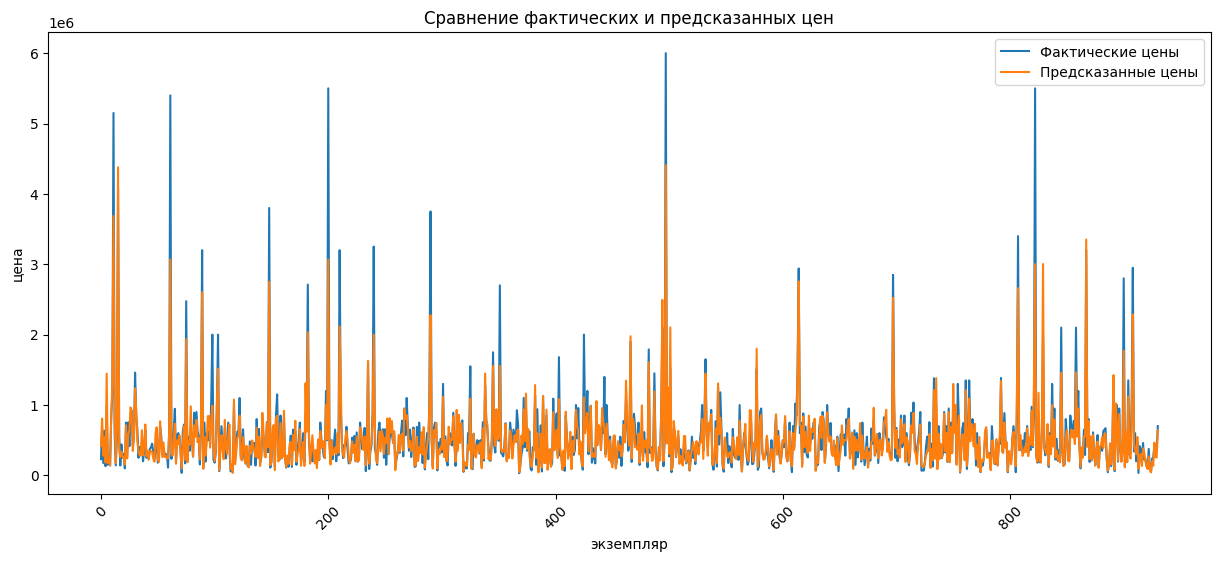

In [109]:
import matplotlib.pyplot as plt

# Фактические цены
actual_prices = merged_df.selling_price

# Предсказанные цены
predicted_prices = merged_df.pred

# Создание списка дат
dates = [i for i in range(len(actual_prices))]

plt.figure(figsize=(15, 6))

# Построение графика
plt.plot(dates, actual_prices, label='Фактические цены')
plt.plot(dates, predicted_prices, label='Предсказанные цены')

# Добавление легенды
plt.legend()

# Добавление заголовка и меток осей
plt.title('Сравнение фактических и предсказанных цен')
plt.xlabel('экземпляр')
plt.ylabel('цена')

# Поворот меток оси x для лучшей читаемости
plt.xticks(rotation=45)


# Отображение графика
plt.show()

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [110]:
def business_metrics(y_true, y_pred):
    import pandas as pd
    y_pred = pd.DataFrame(y_pred, columns = ['pred'])
    merged_df = pd.concat([y_true, y_pred], axis = 1)
    
    merged_df['pred_proc_fact'] = (merged_df['pred'] / merged_df['selling_price'])-1
    
    return len(merged_df[abs(merged_df.pred_proc_fact) <= 0.1])/len(merged_df)*100

In [111]:
calculate_metric = business_metrics(Y_new, Y_new_pred)
print(f'Доля предиктов, отличающихся от реальных цен на авто не более чем на 10%: {calculate_metric}%')

Доля предиктов, отличающихся от реальных цен на авто не более чем на 10%: 28.034371643394202%


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

<font color='red'>**Комментарий**: Сервисная часть написана в main.py.</font>

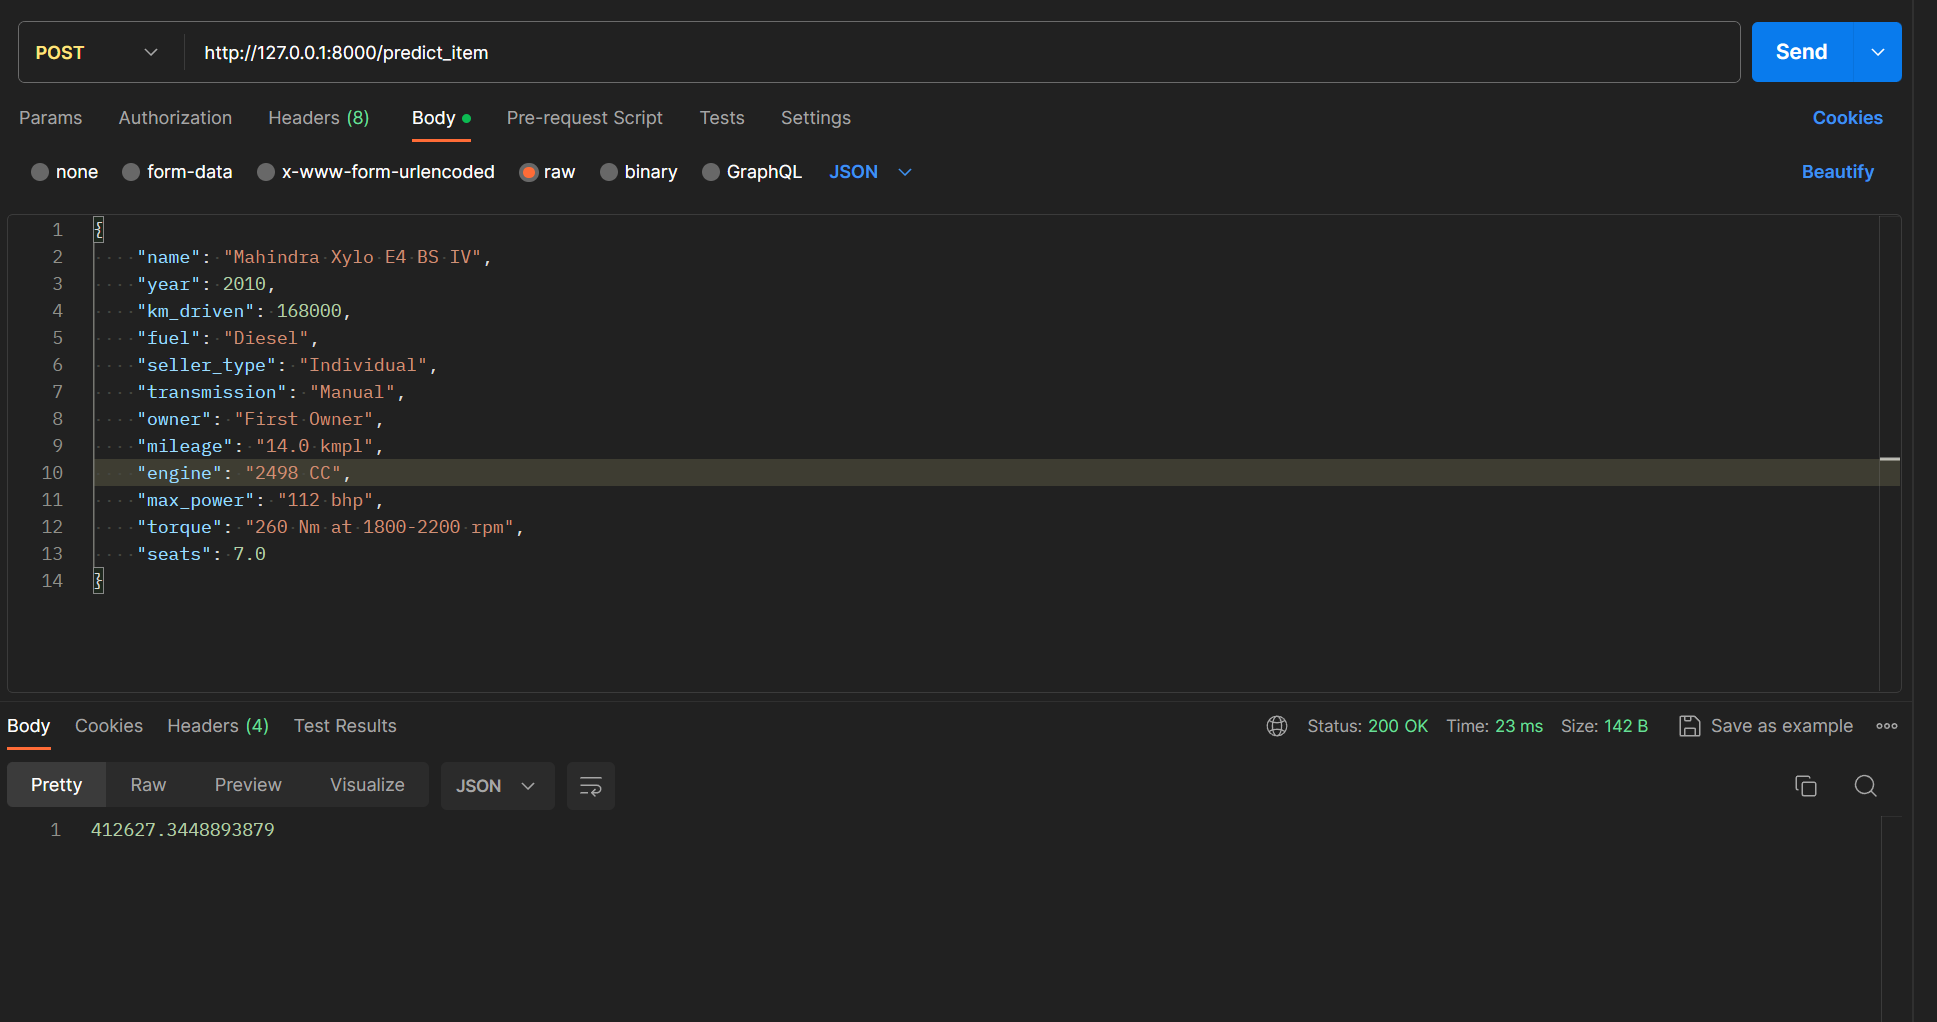

In [112]:
from IPython.display import Image

Image(filename='метод predict item.png')

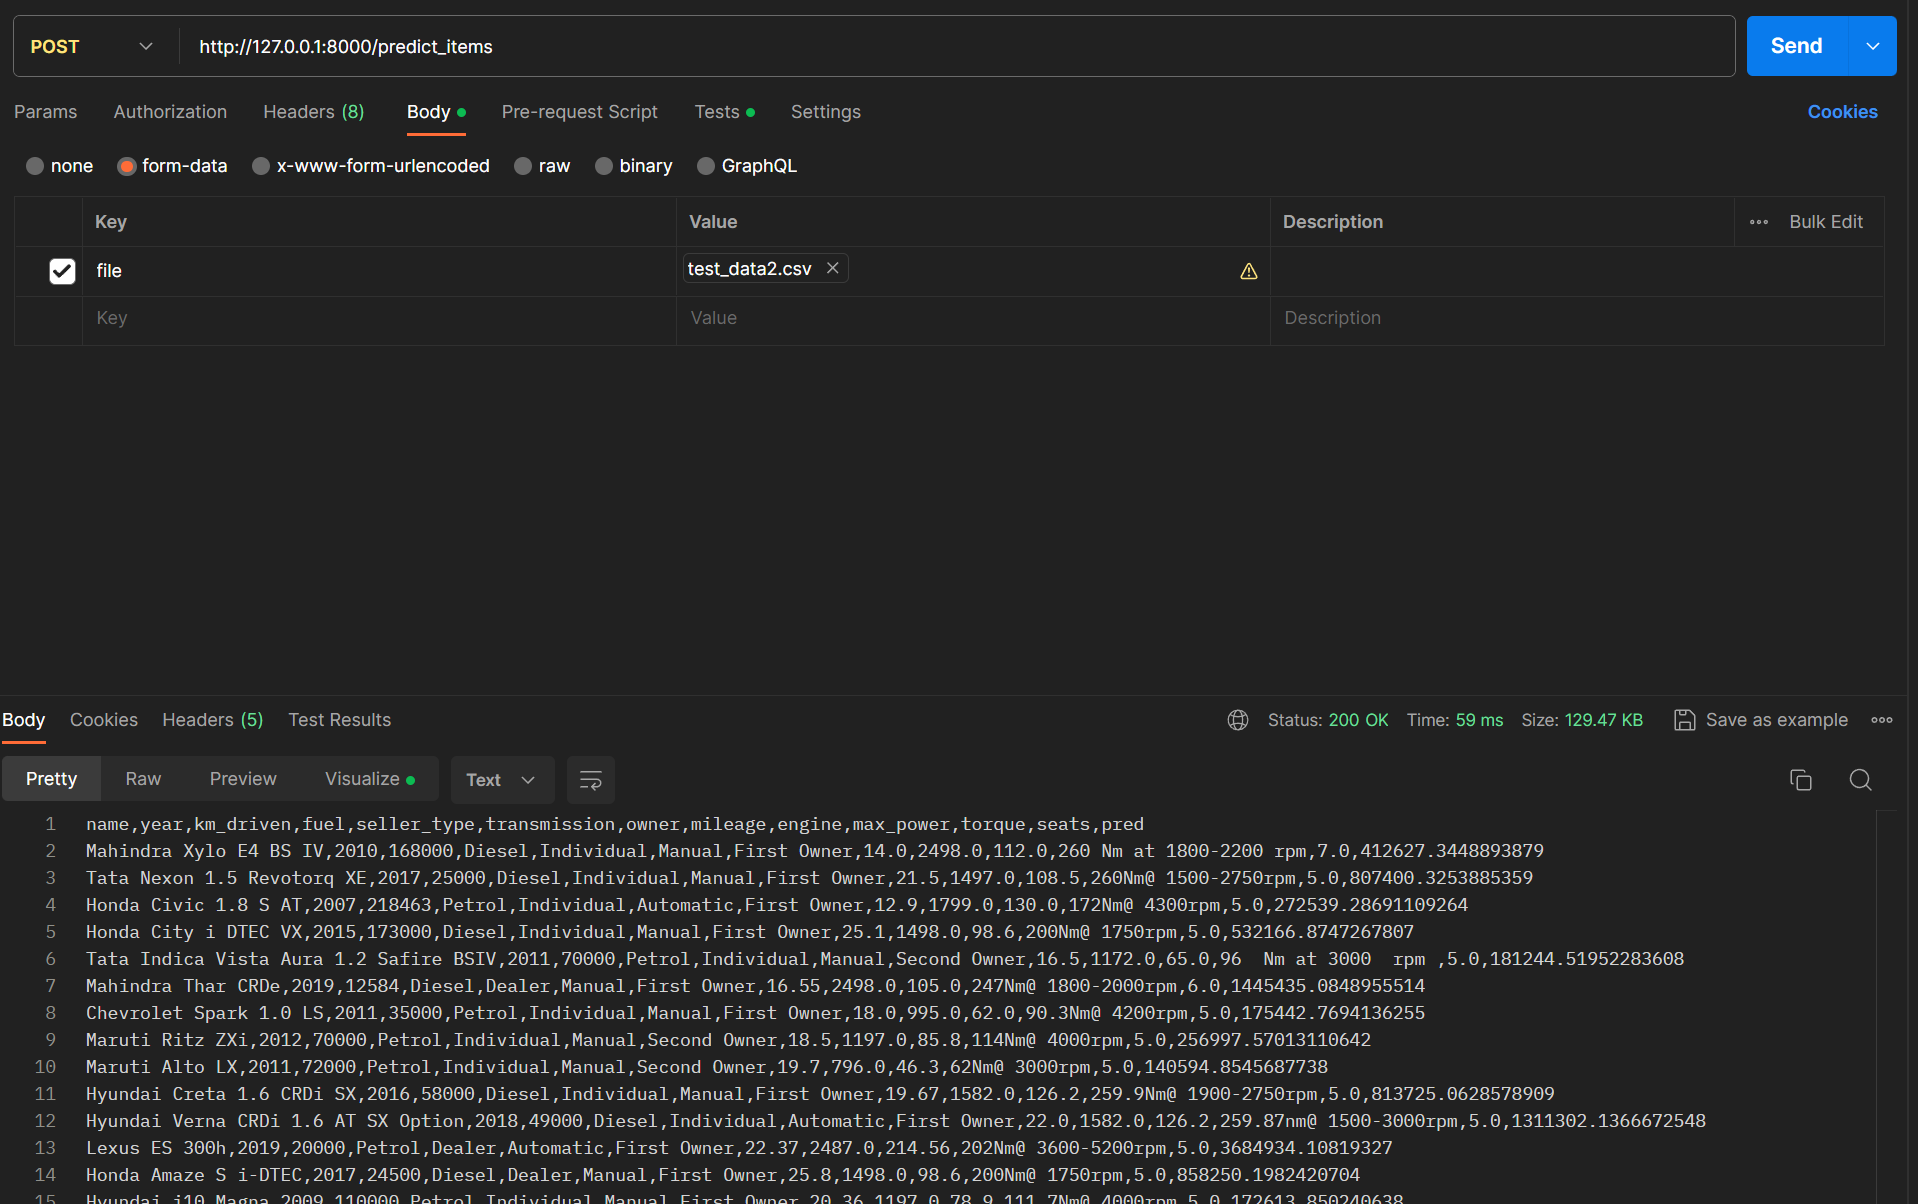

In [113]:
Image(filename='метод predict itemS.png')

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link